In [1]:
import pandas as pd
train_mapped = pd.read_csv("C:/Users/murkr/Downloads/train_data_mapped.csv")
display(train_mapped)

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,June,22,21,Poland,15648,blouses,C20,violet,top left,Profile,48,1,2
1,2008,May,19,6,Poland,10018,skirts,B26,violet,top right,En face,57,1,2
2,2008,July,15,2,Poland,19388,blouses,C13,of many colors,bottom in the middle,En face,48,1,1
3,2008,May,2,2,Poland,7181,skirts,B11,black,bottom left,En face,43,2,1
4,2008,June,9,16,Poland,13493,skirts,B31,of many colors,bottom in the middle,En face,57,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,2008,July,4,3,Poland,17622,sale,P19,black,top left,En face,48,1,2
132375,2008,June,19,9,Poland,15165,blouses,C26,white,top right,En face,28,2,2
132376,2008,July,15,4,Poland,19359,trousers,A4,blue,top in the middle,Profile,38,2,1
132377,2008,July,28,16,Poland,21454,blouses,C50,of many colors,bottom in the middle,Profile,20,2,3


2025/06/05 08:18:21 INFO mlflow.tracking.fluent: Experiment with name 'KMeans_Clustering' does not exist. Creating a new experiment.


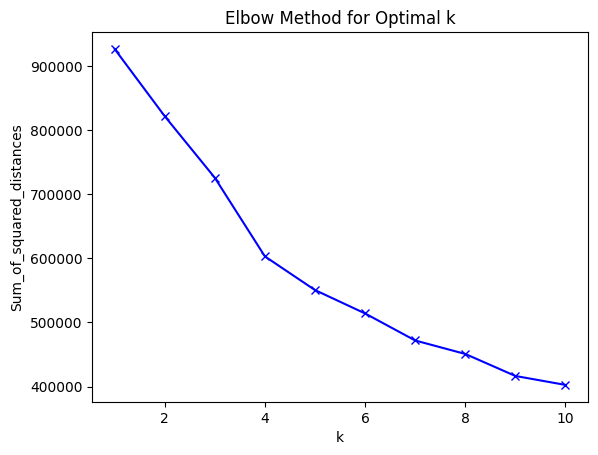

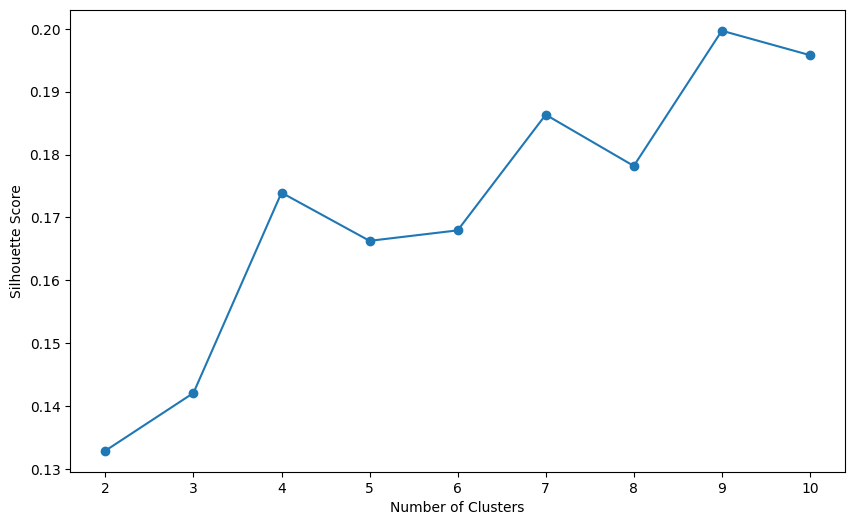

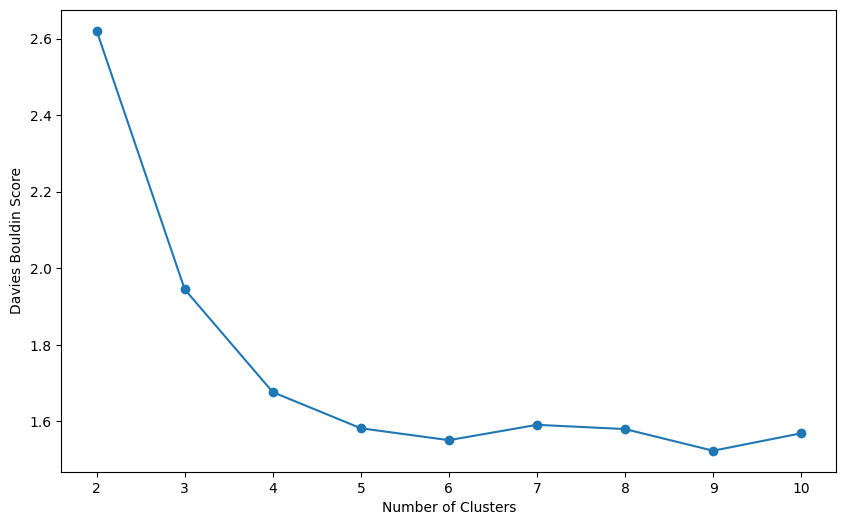

In [2]:
#FEATURE SELECTION FOR K-MEANS CLUSTERING.
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mlflow
import mlflow.sklearn
import os

# Start MLflow Experiment
mlflow.set_experiment("KMeans_Clustering")
# Load the preprocessed data
train_preprocessed = pd.read_csv("C:/Users/murkr/Downloads/train_data_preprocessed.csv")

# Define the features and target
X_train=train_preprocessed[['month','country','page1_main_category','colour','location','model_photography','page2_clothing_model']]
 
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit KMeans model
kmeans = KMeans(n_clusters=4,max_iter=100, random_state=42)
kmeans.fit(X_train_scaled)
kmeans.labels_

#ELBOW CURVE.
import matplotlib.pyplot as plt
import numpy as np
ssd=[]  # Sum of squared distances
K = range(1, 11)  # Range of clusters to try
for k in K:
    kmeans = KMeans(n_clusters=k, max_iter=100, random_state=42)
    kmeans.fit(X_train_scaled)
    ssd.append(kmeans.inertia_)
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal k')
plt.show()

#SILHOUETTE analysis.
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_scaled)
    silhouette_avg.append(silhouette_score(X_train_scaled, cluster_labels))
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


#DAVIES BOULDIN SCORE.
from sklearn.metrics import davies_bouldin_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
db_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_scaled)
    db_scores.append(davies_bouldin_score(X_train_scaled, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, db_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()


In [3]:
#WANT TO TABULATE THE SILHOUETTE SCORE AND DAVIES BOULDIN SCORE.
results = pd.DataFrame({
    'Number of Clusters': range_n_clusters,
    'Silhouette Score': silhouette_avg,
    'Davies Bouldin Score': db_scores
})
display(results)

,Number of Clusters,Silhouette Score,Davies Bouldin Score
0,2,0.132881,2.620440
1,3,0.142067,1.945102
2,4,0.173927,1.676593
3,5,0.166267,1.582255
4,6,0.167934,1.551132
5,7,0.186332,1.591230
6,8,0.178180,1.580149
7,9,0.199691,1.523588
8,10,0.195803,1.569110


2025/06/05 09:35:11 INFO mlflow.tracking.fluent: Experiment with name 'DBSCAN_Clustering' does not exist. Creating a new experiment.


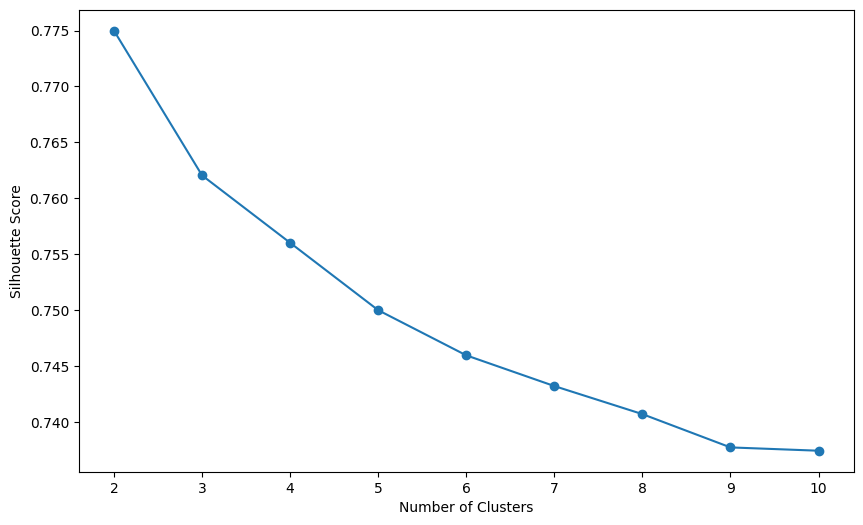

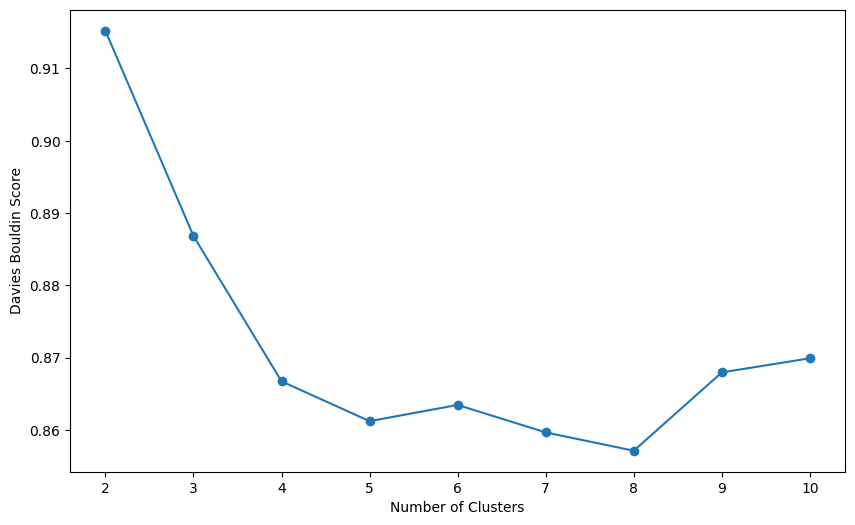

In [4]:
#DBSCAN CLUSTERING.
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import mlflow
import mlflow.sklearn
import os
# Start MLflow Experiment
mlflow.set_experiment("DBSCAN_Clustering")
# Load the preprocessed data
train_preprocessed = pd.read_csv("C:/Users/murkr/Downloads/train_data_preprocessed.csv")

# Define the features and target
X_train=train_preprocessed[['month','country','page1_main_category','colour','location','model_photography','page2_clothing_model']]
 
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_train_scaled)
dbscan.labels_

#SILHOUETTE analysis.
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for n_clusters in range_n_clusters:
    dbscan = DBSCAN(eps=0.5, min_samples=n_clusters)
    cluster_labels = dbscan.fit_predict(X_train_scaled)
    silhouette_avg.append(silhouette_score(X_train_scaled, cluster_labels))
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

#DAVIES BOULDIN SCORE.
from sklearn.metrics import davies_bouldin_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
db_scores = []
for n_clusters in range_n_clusters:
    dbscan = DBSCAN(eps=0.5, min_samples=n_clusters)
    cluster_labels = dbscan.fit_predict(X_train_scaled)
    db_scores.append(davies_bouldin_score(X_train_scaled, cluster_labels))
 
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, db_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()

In [13]:
#WANT TO PRINT THE SILHOUETTE SCORE AND DAVIES BOULDIN SCORE.
results_dbscan = pd.DataFrame({
    'Number of Clusters': range_n_clusters,
    'Silhouette Score': silhouette_avg,
    'Davies Bouldin Score': db_scores
})
display(results_dbscan)

,Number of Clusters,Silhouette Score,Davies Bouldin Score
0,2,0.774987,0.915219
1,3,0.762043,0.886839
2,4,0.756014,0.866735
3,5,0.749985,0.861226
4,6,0.745947,0.863468
5,7,0.743198,0.859668
6,8,0.740688,0.857137
7,9,0.737710,0.867972
8,10,0.737414,0.869920


In [14]:
train_preprocessed["price_2"].value_counts()

price_2
1    67714
2    64665
Name: count, dtype: int64

Validation Accuracy: 0.8793624414564134
Test Accuracy: 0.8797933097633941

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.87      0.90      0.88     13556
           2       0.89      0.86      0.87     12920

    accuracy                           0.88     26476
   macro avg       0.88      0.88      0.88     26476
weighted avg       0.88      0.88      0.88     26476


Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.87      0.90      0.89     16981
           2       0.89      0.86      0.87     16112

    accuracy                           0.88     33093
   macro avg       0.88      0.88      0.88     33093
weighted avg       0.88      0.88      0.88     33093


Confusion Matrix (Validation Set):
[[12233  1323]
 [ 1871 11049]]

Confusion Matrix (Test Set):
[[15322  1659]
 [ 2319 13793]]


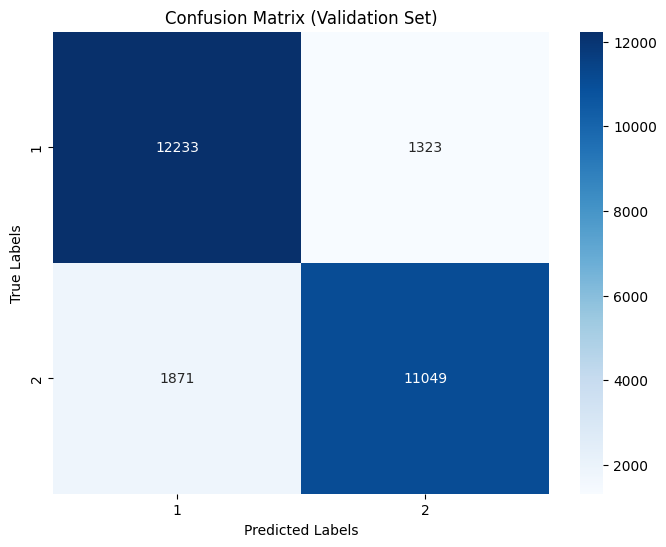

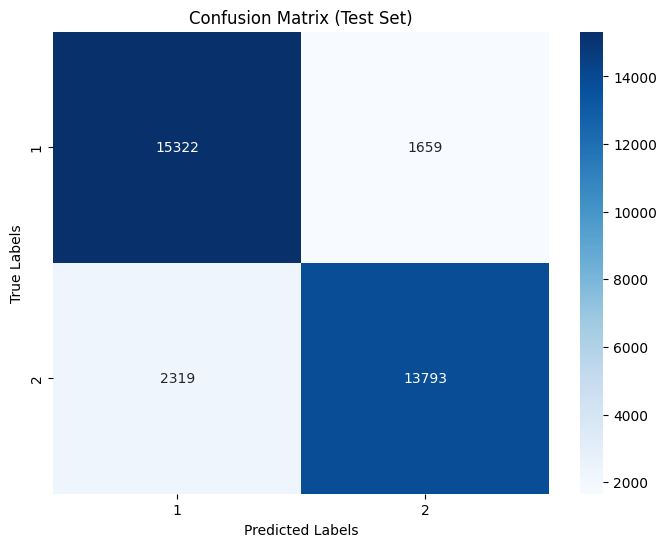

2025/06/06 11:43:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import mlflow
import mlflow.sklearn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Start MLflow Experiment
mlflow.set_experiment("Logistic_Regression")

train_cleaned = pd.read_csv("C:/Users/murkr/Downloads/train_data_cleaned.csv")
test_cleaned = pd.read_csv("C:/Users/murkr/Downloads/test_data_cleaned.csv")

# Display the train dataset (optional)


# Define the features and target
X_train = train_cleaned[['month', 'country', 'page1_main_category', 'colour', 'location', 'model_photography', 'page2_clothing_model','page', 'price']]
y_train = train_cleaned['price_2']

X_test = test_cleaned[['month', 'country', 'page1_main_category', 'colour', 'location', 'model_photography', 'page2_clothing_model','page', 'price']]
y_test = test_cleaned['price_2']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model_lg = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warning occurs
model_lg.fit(X_train, y_train)

# Make predictions
y_pred_val_lg = model_lg.predict(X_val)
y_pred_test_lg = model_lg.predict(X_test)

# Calculate accuracy
accuracy_val_lg = accuracy_score(y_val, y_pred_val_lg)
accuracy_test_lg = accuracy_score(y_test, y_pred_test_lg)

# Print accuracy
print(f"Validation Accuracy: {accuracy_val_lg}")
print(f"Test Accuracy: {accuracy_test_lg}")

# Classification report
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_pred_val_lg))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test_lg))

# Confusion Matrix for Validation Set
cm_val_lg = confusion_matrix(y_val, y_pred_val_lg)
print("\nConfusion Matrix (Validation Set):")
print(cm_val_lg)

# Confusion Matrix for Test Set
cm_test_lg = confusion_matrix(y_test, y_pred_test_lg)
print("\nConfusion Matrix (Test Set):")
print(cm_test_lg)

# Plot Confusion Matrix for Visualization (Validation Set)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val_lg, annot=True, fmt='d', cmap='Blues', xticklabels=model_lg.classes_, yticklabels=model_lg.classes_)
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot Confusion Matrix for Visualization (Test Set)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_lg, annot=True, fmt='d', cmap='Blues', xticklabels=model_lg.classes_, yticklabels=model_lg.classes_)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Log the model and metrics to MLflow
with mlflow.start_run():
    mlflow.sklearn.log_model(model_lg, "logistic_regression_model")  # Naming the model
    mlflow.log_metric("Validation_Accuracy", accuracy_val_lg)
    mlflow.log_metric("Test_Accuracy", accuracy_test_lg)
    mlflow.log_param("Max_Iter", 1000)  # Log any hyperparameters (like max_iter)

2025/06/06 11:44:00 INFO mlflow.tracking.fluent: Experiment with name 'Decision_Tree' does not exist. Creating a new experiment.


Validation Accuracy: 1.0
Test Accuracy: 1.0

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     13556
           2       1.00      1.00      1.00     12920

    accuracy                           1.00     26476
   macro avg       1.00      1.00      1.00     26476
weighted avg       1.00      1.00      1.00     26476


Classification Report (Test Set):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     16981
           2       1.00      1.00      1.00     16112

    accuracy                           1.00     33093
   macro avg       1.00      1.00      1.00     33093
weighted avg       1.00      1.00      1.00     33093


Confusion Matrix (Validation Set):
[[13556     0]
 [    0 12920]]

Confusion Matrix (Test Set):
[[16981     0]
 [    0 16112]]


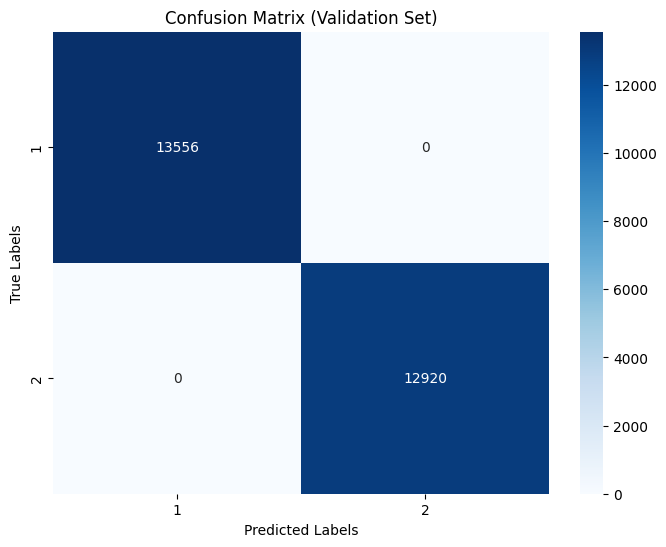

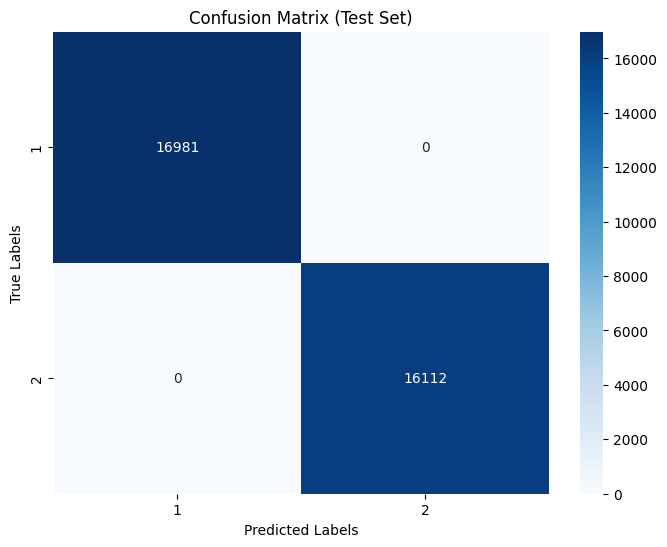

2025/06/06 11:44:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [5]:
#DECISION TREE CLASSIFIER.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import mlflow
import mlflow.sklearn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Start MLflow Experiment
mlflow.set_experiment("Decision_Tree")
# Load the preprocessed data
train_cleaned = pd.read_csv("C:/Users/murkr/Downloads/train_data_cleaned.csv")
test_cleaned= pd.read_csv("C:/Users/murkr/Downloads/test_data_cleaned.csv")

# Display the train dataset (optional)
# Define the features and target
X_train = train_cleaned[['month', 'country', 'page1_main_category', 'colour', 'location', 'model_photography', 'page2_clothing_model','page','price']]
y_train = train_cleaned['price_2']

X_test = test_cleaned[['month', 'country', 'page1_main_category', 'colour', 'location', 'model_photography', 'page2_clothing_model','page','price']]
y_test = test_cleaned['price_2']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
# Make predictions
y_pred_val_dt = model_dt.predict(X_val)
y_pred_test_dt = model_dt.predict(X_test)
# Calculate accuracy
accuracy_val_dt = accuracy_score(y_val, y_pred_val_dt)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)
# Print accuracy

print(f"Validation Accuracy: {accuracy_val_dt}")
print(f"Test Accuracy: {accuracy_test_dt}")

# classification report
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_pred_val_dt))
print("\nClassification Report (Test Set):")


print(classification_report(y_test, y_pred_test_dt))
# Confusion Matrix for Validation Set
cm_val_dt = confusion_matrix(y_val, y_pred_val_dt)
print("\nConfusion Matrix (Validation Set):")
print(cm_val_dt)
# Confusion Matrix for Test Set
cm_test_dt = confusion_matrix(y_test, y_pred_test_dt)
print("\nConfusion Matrix (Test Set):")
print(cm_test_dt)
# Plot Confusion Matrix for Visualization (Validation Set)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val_dt, annot=True, fmt='d', cmap='Blues', xticklabels=model_dt.classes_, yticklabels=model_dt.classes_)
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot Confusion Matrix for Visualization (Test Set)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_dt, annot=True, fmt='d', cmap='Blues', xticklabels=model_dt.classes_, yticklabels=model_dt.classes_)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Log the model and metrics to MLflow
with mlflow.start_run():
    mlflow.sklearn.log_model(model_dt, "decision_tree_model")  # Naming the model
    mlflow.log_metric("Validation_Accuracy", accuracy_val_dt)
    mlflow.log_metric("Test_Accuracy", accuracy_test_dt)
    mlflow.log_param("Max_Iter", 1000)  # Log any hyperparameters (like max_iter)
    mlflow.log_param("Criterion", "gini")  # Log the criterion used for splitting

2025/06/06 11:46:03 INFO mlflow.tracking.fluent: Experiment with name 'Random_Forest' does not exist. Creating a new experiment.


Validation Accuracy: 0.9087475449463666
Test Accuracy: 0.9125192638926661

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.94      0.88      0.91     13556
           2       0.88      0.94      0.91     12920

    accuracy                           0.91     26476
   macro avg       0.91      0.91      0.91     26476
weighted avg       0.91      0.91      0.91     26476


Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.94      0.88      0.91     16981
           2       0.88      0.95      0.91     16112

    accuracy                           0.91     33093
   macro avg       0.91      0.91      0.91     33093
weighted avg       0.91      0.91      0.91     33093


Confusion Matrix (Validation Set):
[[11888  1668]
 [  748 12172]]

Confusion Matrix (Test Set):
[[14972  2009]
 [  886 15226]]


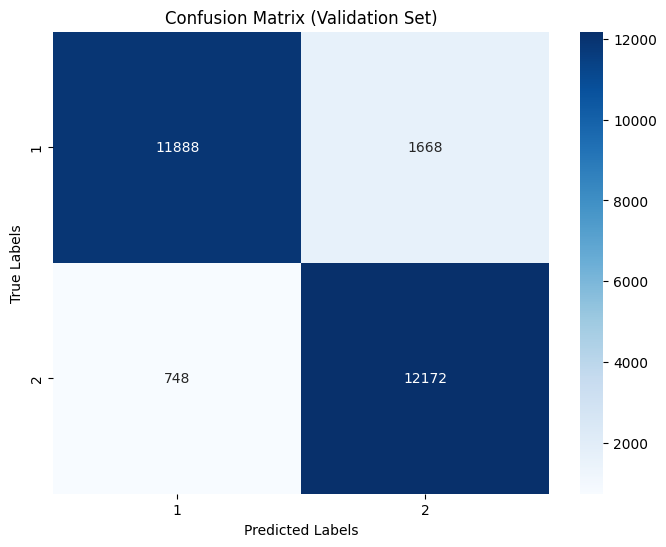

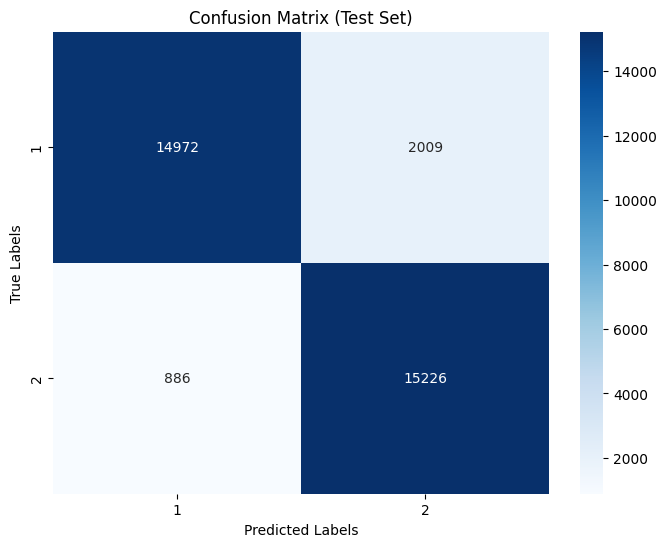

2025/06/06 11:46:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [6]:
#RANDOM FOREST CLASSIFIER.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import mlflow
import mlflow.sklearn
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Start MLflow Experiment
mlflow.set_experiment("Random_Forest")
# Load the preprocessed data
train_cleaned= pd.read_csv("C:/Users/murkr/Downloads/train_data_cleaned.csv")
test_cleaned = pd.read_csv("C:/Users/murkr/Downloads/test_data_cleaned.csv")




# Define the features and target
X_train = train_cleaned[['month', 'country', 'page1_main_category', 'colour', 'location', 'model_photography', 'page2_clothing_model','page','price']]
y_train = train_cleaned['price_2']

X_test = test_cleaned[['month', 'country', 'page1_main_category', 'colour', 'location', 'model_photography', 'page2_clothing_model','page','price']]
y_test = test_cleaned['price_2']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model
model_rf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)
model_rf.fit(X_train, y_train)
# Make predictions
y_pred_val_rf = model_rf.predict(X_val)
y_pred_test_rf = model_rf.predict(X_test)
# Calculate accuracy
accuracy_val_rf = accuracy_score(y_val, y_pred_val_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
# Print accuracy
print(f"Validation Accuracy: {accuracy_val_rf}")
print(f"Test Accuracy: {accuracy_test_rf}")

# classification report
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_pred_val_rf))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test_rf))

# Confusion Matrix for Validation Set
cm_val_rf = confusion_matrix(y_val, y_pred_val_rf)
print("\nConfusion Matrix (Validation Set):")
print(cm_val_rf)
# Confusion Matrix for Test Set
cm_test_rf = confusion_matrix(y_test, y_pred_test_rf)
print("\nConfusion Matrix (Test Set):")
print(cm_test_rf)

# Plot Confusion Matrix for Visualization (Validation Set)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val_rf, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot Confusion Matrix for Visualization (Test Set)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Log the model and metrics to MLflow
with mlflow.start_run():
    mlflow.sklearn.log_model(model_rf, "random_forest_model")  # Naming the model
    mlflow.log_metric("Validation_Accuracy", accuracy_val_rf)
    mlflow.log_metric("Test_Accuracy", accuracy_test_rf)
    mlflow.log_param("n_estimators", 10)  # Log the number of trees in the forest
    mlflow.log_param("max_depth", 2)  # Log the maximum depth of the tree
    mlflow.log_param("random_state", 42)  # Log the random state for reproducibility

2025/06/06 11:47:42 INFO mlflow.tracking.fluent: Experiment with name 'Neural_Network' does not exist. Creating a new experiment.


Validation Accuracy: 1.0
Test Accuracy: 1.0

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     13556
           2       1.00      1.00      1.00     12920

    accuracy                           1.00     26476
   macro avg       1.00      1.00      1.00     26476
weighted avg       1.00      1.00      1.00     26476


Classification Report (Test Set):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     16981
           2       1.00      1.00      1.00     16112

    accuracy                           1.00     33093
   macro avg       1.00      1.00      1.00     33093
weighted avg       1.00      1.00      1.00     33093


Confusion Matrix (Validation Set):
[[13556     0]
 [    0 12920]]

Confusion Matrix (Test Set):
[[16981     0]
 [    0 16112]]


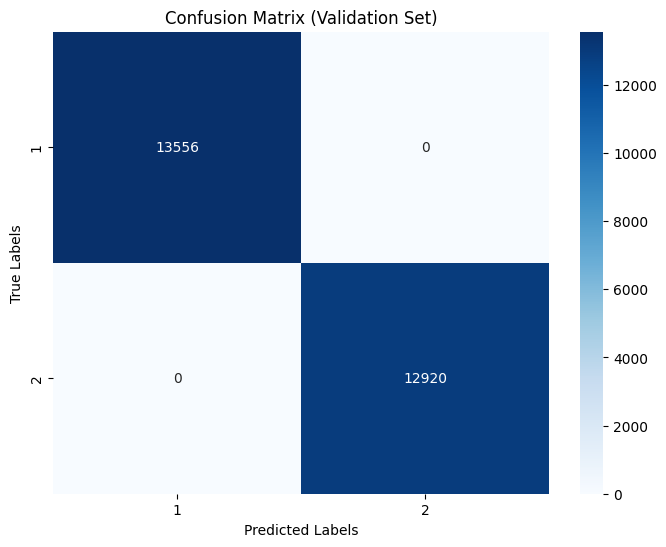

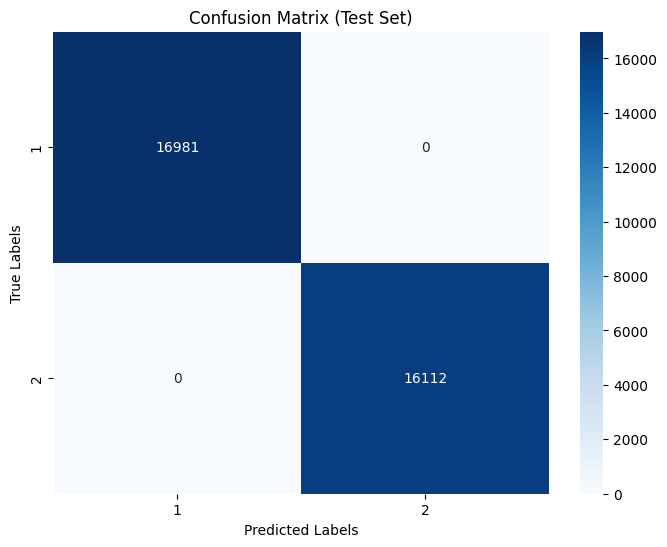

2025/06/06 11:48:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [7]:
#NEURAL NETWORK CLASSIFIER.
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import mlflow
import mlflow.sklearn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Start MLflow Experiment
mlflow.set_experiment("Neural_Network")
# Load the preprocessed data
train_cleaned = pd.read_csv("C:/Users/murkr/Downloads/train_data_cleaned.csv")
test_cleaned = pd.read_csv("C:/Users/murkr/Downloads/test_data_cleaned.csv")


# Define the features and target
X_train = train_cleaned[['month', 'country', 'page1_main_category', 'colour', 'location', 'model_photography', 'page2_clothing_model','page','price']]
y_train = train_cleaned['price_2']

X_test = test_cleaned[['month', 'country', 'page1_main_category', 'colour', 'location', 'model_photography', 'page2_clothing_model','page', 'price']]
y_test = test_cleaned['price_2']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model
model_nn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42, max_iter=1000)
model_nn.fit(X_train, y_train)

# Make predictions
y_pred_val_nn = model_nn.predict(X_val)
y_pred_test_nn = model_nn.predict(X_test)
# Calculate accuracy
accuracy_val_nn = accuracy_score(y_val, y_pred_val_nn)
accuracy_test_nn = accuracy_score(y_test, y_pred_test_nn)
# Print accuracy
print(f"Validation Accuracy: {accuracy_val_nn}")
print(f"Test Accuracy: {accuracy_test_nn}")

# classification report
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_pred_val_nn))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test_nn))

# Confusion Matrix for Validation Set   
cm_val_nn = confusion_matrix(y_val, y_pred_val_nn)
print("\nConfusion Matrix (Validation Set):")
print(cm_val_nn)
# Confusion Matrix for Test Set
cm_test_nn = confusion_matrix(y_test, y_pred_test_nn)
print("\nConfusion Matrix (Test Set):")
print(cm_test_nn)
# Plot Confusion Matrix for Visualization (Validation Set)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val_nn, annot=True, fmt='d', cmap='Blues', xticklabels=model_nn.classes_, yticklabels=model_nn.classes_)
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot Confusion Matrix for Visualization (Test Set)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_nn, annot=True, fmt='d', cmap='Blues', xticklabels=model_nn.classes_, yticklabels=model_nn.classes_)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Log the model and metrics to MLflow
with mlflow.start_run():
    mlflow.sklearn.log_model(model_nn, "neural_network_model")  # Naming the model
    mlflow.log_metric("Validation_Accuracy", accuracy_val_nn)
    mlflow.log_metric("Test_Accuracy", accuracy_test_nn)
    mlflow.log_param("hidden_layer_sizes", (100,))  # Log the size of hidden layers
    mlflow.log_param("activation", "relu")  # Log the activation function used
    mlflow.log_param("solver", "adam")  # Log the solver used for weight optimization
    mlflow.log_param("random_state", 42)  # Log the random state for reproducibility

In [8]:
%pip install tabulate
from tabulate import tabulate

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
data= [
    [model_rf, accuracy_test_rf, accuracy_val_rf],
    [model_dt, accuracy_test_dt, accuracy_val_dt],
    [model_nn, accuracy_test_nn, accuracy_val_nn],
    [model_lg, accuracy_test_lg, accuracy_val_lg]
]
columns=['Model','Test Accuracy','Validation Accuracy']
print(tabulate(data, headers=columns, tablefmt="fancy_grid"))

╒═══════════════════════════════════════════════════════════════════════╤═════════════════╤═══════════════════════╕
│ Model                                                                 │   Test Accuracy │   Validation Accuracy │
╞═══════════════════════════════════════════════════════════════════════╪═════════════════╪═══════════════════════╡
│ RandomForestClassifier(max_depth=2, n_estimators=10, random_state=42) │        0.912519 │              0.908748 │
├───────────────────────────────────────────────────────────────────────┼─────────────────┼───────────────────────┤
│ DecisionTreeClassifier()                                              │        1        │              1        │
├───────────────────────────────────────────────────────────────────────┼─────────────────┼───────────────────────┤
│ MLPClassifier(max_iter=1000, random_state=42)                         │        1        │              1        │
├───────────────────────────────────────────────────────────────────────

In [10]:
#PICKLE THE MLP CLASSIFIER MODEL.
import pickle
# Save the model to disk
with open('model_nn.pkl', 'wb') as file:
    pickle.dump(model_nn, file)
print("Model saved to disk as neural_network_model.pkl")

Model saved to disk as neural_network_model.pkl
